# Team F1's Linear Regression model

Team members include Patrick, Carter, Jaegeon and Merlin

In [62]:
pip install feature-engine

Note: you may need to restart the kernel to use updated packages.


In [71]:
#importing all the different libraries that we will need for this part. 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from feature_engine.transformation import ReciprocalTransformer
from feature_engine.transformation import LogTransformer
from feature_engine.pipeline import Pipeline

Here we pull in the data that will to be used for our predictors and qualifiers.  We can pull from two different csv files, but should be careful that they line up. <br>
The list in the X dataframe should contain all the different columns that we want to use, such as "gap_between_mean" or "circuitType_RACE"

In [168]:
xdata = pd.read_csv(r"C:\Users\luker\OneDrive\Desktop\erdos_ds_f1\Merlin preview\gaps and circuit type (no DNF).csv")  #or we can use different files for each, but they should be in the right order

ydata = pd.read_csv(r"C:\Users\luker\OneDrive\Desktop\erdos_ds_f1\cleaned_data\mean_position_difference_no_DNF.csv")

# 'First_ten_gap', 'Bgap_mean'
X  = xdata[ ["Bgap_mean", "First_ten_gap"]]



#getting rid of any nan variables
X = X.dropna() 

Y = ydata["mean_position_difference_no_DNF"]  #this is our target, what we are trying to predict, and will use this to test our predictive model. 


# We need to make sure that the X and Y dataframes are aligned, so we will drop any rows in Y that do not have a corresponding row in X
Y = Y[X.index]  #this will ensure that Y is aligned with X, so that we can use them together in our model.

X_train,X_test , Y_train, Y_test = train_test_split(X,Y , test_size= 0.2, random_state= 117)


(0.0, 10000.0)

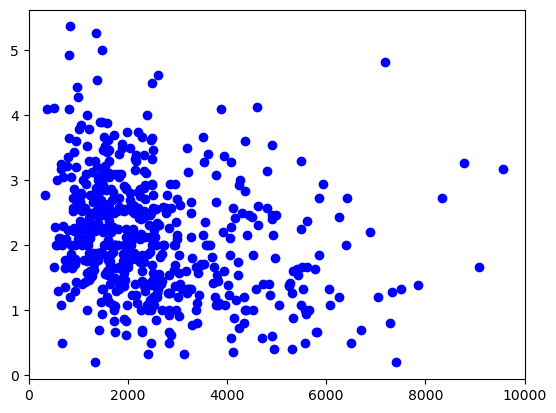

In [169]:
# Plot X vs Y
import matplotlib.pyplot as plt
plt.scatter(X_train['First_ten_gap'], Y_train, color='blue', label='Bgap_std')
plt.xlim(0,10000)

Here we create the pipeline for how our model will be run.  We try to use LogTransform.

In [170]:
data = LogTransformer(variables=['Bgap_mean', 'First_ten_gap'])

transformed_X_train = data.fit_transform(X_train)
transformed_X_test = data.transform(X_test)

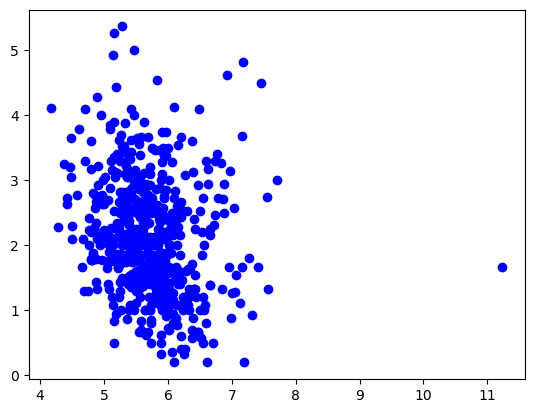

In [171]:
# Plot transformed X vs Y
import matplotlib.pyplot as plt
plt.scatter(transformed_X_train['Bgap_mean'], Y_train, color='blue', label='Bgap_std')


Here is where we train the model, making sure not to use any of our testing data.  That would mean there is data leakage. 

This is without transformation:

In [172]:
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

# Calculate and print the metrics
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.7197390083723811
R-squared: 0.0033047739937553944


We try using a log transformation:

In [181]:
pipe = Pipeline(steps=[
    ('reciprocal', ReciprocalTransformer()),
    ('linear_regression', LinearRegression())
])

In [182]:
pipe.fit(X_train, Y_train)
log_Y_pred = pipe.predict(X_test)

# Calculate and print the metrics for the pipeline model
mse = mean_squared_error(Y_test, log_Y_pred)
r2 = r2_score(Y_test, log_Y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.6852393095951844
R-squared: 0.05107998788364221


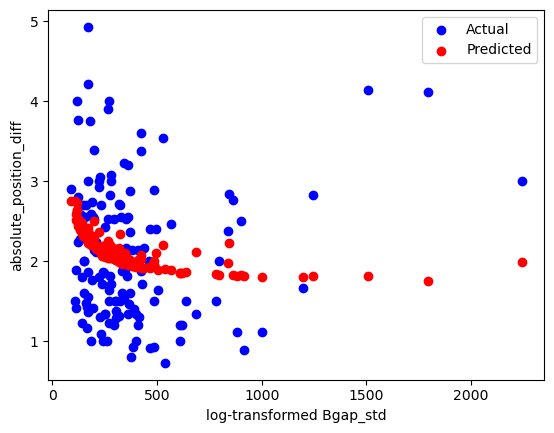

In [183]:
# Plot the prediction line given by pipeline model
plt.scatter(X_test['Bgap_mean'], Y_test, color='blue', label='Actual')
plt.scatter(X_test['Bgap_mean'], log_Y_pred, color='red', label='Predicted')
plt.xlabel('log-transformed Bgap_std')
plt.ylabel('absolute_position_diff')
plt.legend()
plt.show()
